# Michigan Neighborhood Segmentation

## Authors
### Md Asif Shahjalal
### Rafi Ud Daula Refat
### Aishwarya Kadam

# Importing Libraries

In [11]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [12]:
# # define the dataframe columns
# column_names = ['Areas', 'PostCode', 'Latitude', 'Longitude'] 

# # instantiate the dataframe
# neighborhoods = pd.DataFrame(columns=column_names)

# Reading the zipcode csv file 

In [13]:
neighborhoods1 = pd.read_csv('zipcode.csv')
neighborhoods1.head()

,Area,PostCode,Lat,Lon
0,ADDISON,49220,42.007252,-84.322649
1,ADRIAN,49221,41.885177,-84.059029
2,ALBION,49224,42.293696,-84.752448
3,ALGONAC,48001,42.643334,-82.583495
4,ALLEN,49227,41.938728,-84.752448


In [25]:
print(" The dataset has " + str(len(neighborhoods1)) + " unique postcodes")

 The dataset has 904 unique postcodes


In [26]:
neighborhoods = neighborhoods1

In [27]:
print('The dataframe has {} unique areas.'.format(
        len(neighborhoods['Area'].unique()),
    )
)

The dataframe has 755 unique areas.


# Visualizing the Michigan postal codes from the dataset

In [30]:
address = 'Lansing, MI'

geolocator = Nominatim(user_agent="mi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lansing,MI are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lansing,MI are 42.7337712, -84.5553805.


In [34]:
# create map of New York using latitude and longitude values
map_detroit = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, area, postcode in zip(neighborhoods['Lat'], neighborhoods['Lon'], neighborhoods['Area'], neighborhoods['PostCode']):
    label = '{}, {}'.format(postcode, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_detroit)  
    
map_detroit

# Read the michigan venues csv file generated on Data Collection stage

In [74]:
michigan_venues = pd.read_csv('michigan2.csv')

In [75]:
len(michigan_venues)

16681

In [76]:
x = michigan_venues.groupby("Neighborhood")
len(x)

833

# Filtering out the neighborhood which have less than 5 venues within 2 miles

In [77]:
michigan_venues = x.filter(lambda x: x['Neighborhood'].count() > 4)
len(michigan_venues)

16118

In [78]:
# michigan_venues.groupby('Neighborhood').count()
# temp.head()
# len(temp)


In [79]:
# temp = temp[temp['Neighborhood Latitude'] >4]
# len(temp)

In [80]:
print('There are {} uniques categories.'.format(len(michigan_venues['Venue Category'].unique())))

There are 425 uniques categories.


# One hot encoding of the dataset

In [81]:
# one hot encoding
michigan_onehot = pd.get_dummies(michigan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
michigan_onehot['Neighborhood'] = michigan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [michigan_onehot.columns[-1]] + list(michigan_onehot.columns[:-1])
michigan_onehot = michigan_onehot[fixed_columns]

michigan_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great 

In [82]:
michigan_onehot.shape

(16118, 425)

In [83]:
michigan_grouped = michigan_onehot.groupby('Neighborhood').mean().reset_index()
michigan_grouped.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great 

# Plot correlation between features

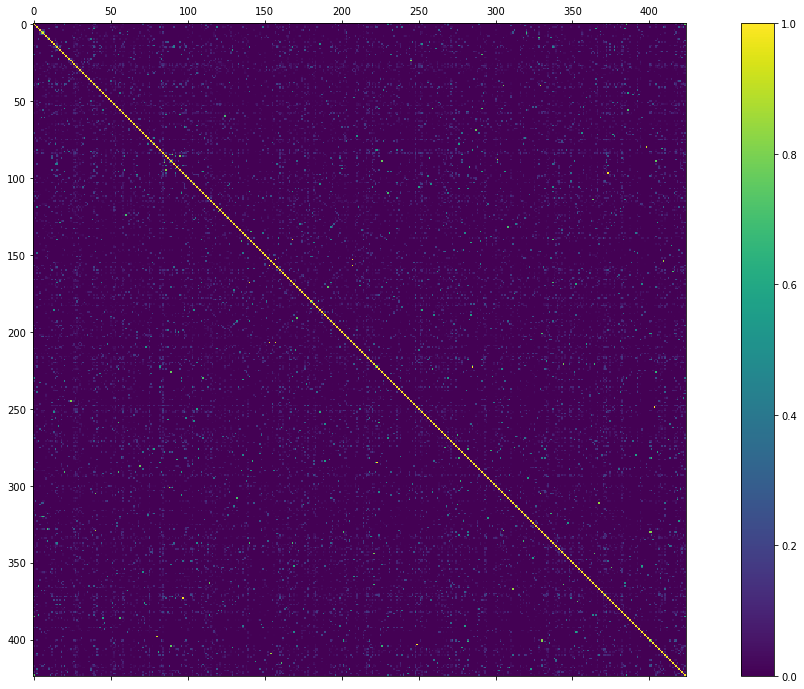

In [101]:
import matplotlib.pyplot as plt
import pandas
import numpy

correlations = michigan_grouped.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

# Get the Top 5 venues from any neighborhood

In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [103]:
num_top_venues = 5

for hood in michigan_grouped['Neighborhood']:
#     print("----"+hood+"----")
    temp = michigan_grouped[michigan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')

In [104]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = michigan_grouped['Neighborhood']

for ind in np.arange(michigan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(michigan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,ADA-49301,Park,Gun Range,Optical Shop,Chinese Restaurant,Golf Course
1,ADDISON-49220,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping
2,ADRIAN-49221,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place
3,ALDEN-49612,Gift Shop,Breakfast Spot,Bakery,Bar,Harbor / Marina
4,ALGONAC-48001,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout


In [105]:
michigan_grouped.shape[0]

598

# Split 10 data points for future testing

In [106]:
# print(michigan_grouped.shape)
test_data = dataset[589:]
dataset = dataset[:588]

# Dimensionality Reduction using PCA

Text(0, 0.5, 'cumulative explained variance')

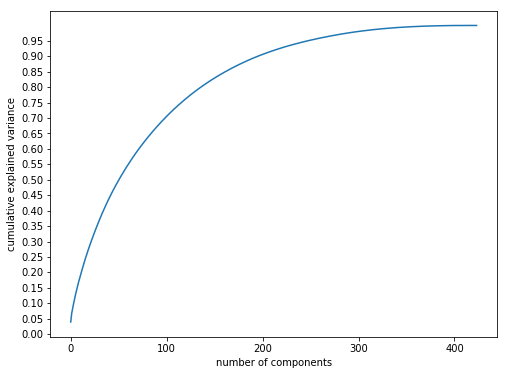

In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

neigh_name = michigan_grouped['Neighborhood']
michigan_grouped_clustering = michigan_grouped.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(michigan_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
# plt.xticks(np.arange(0, 450, step=30))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [108]:
pca = PCA(n_components=200)
dataset = pca.fit_transform(data_rescaled)

# Find cluster number from elbow method

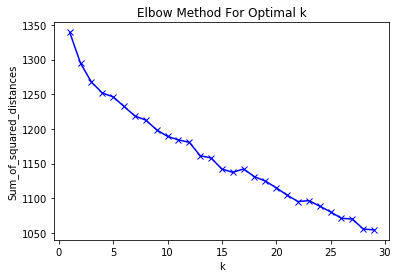

In [127]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Finding cluster number from Silhouette method

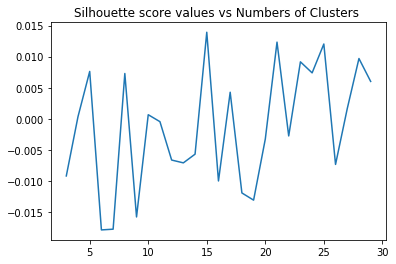

Optimal number of components is:
15


In [126]:
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
 
obs = dataset.copy() 
# obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()
 
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
#     print("Number Of Clusters:")
#     print(i)
#     print("Silhouette score value")
#     print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)


In [128]:
michigan_grouped_clustering = dataset.copy()

In [129]:
michigan_grouped_clustering

array([[ 0.1023047 , -0.21112886, -0.14902056, ..., -0.086712  ,
        -0.01010255, -0.01286315],
       [-0.31066653,  0.07191452,  0.11216676, ..., -0.05469025,
        -0.01958764,  0.05013026],
       [ 0.25616224,  0.09498746, -0.0017428 , ..., -0.01320045,
        -0.03286966,  0.00179178],
       ...,
       [ 0.17463658,  0.00877187, -0.11477124, ..., -0.00821488,
        -0.08890258,  0.06516043],
       [-0.10358812,  0.15473674, -0.21456089, ...,  0.00800548,
         0.06560933, -0.02376321],
       [-0.3438987 , -0.21420249, -0.16147442, ...,  0.03309944,
         0.00471787, -0.02783301]])

In [130]:
# # # set number of clusters
# # kclusters = 3

# # michigan_grouped_clustering = michigan_grouped.drop('Neighborhood', 1)

# # # run k-means clustering
# # kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(michigan_grouped_clustering)

# # # check cluster labels generated for each row in the dataframe
# # kmeans.labels_[0:10] 

# Sum_of_squared_distances = []
# K = range(2, 50)
# for kclusters in K:
#     km = KMeans(n_clusters=kclusters, random_state=0).fit(michigan_grouped_clustering)
#     Sum_of_squared_distances.append(km.inertia_)
    
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

# Fitting K-means algorithm

In [132]:
# set number of clusters
kclusters = 15

# michigan_grouped_clustering = michigan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(michigan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Finding the mean distance from cluster centroids to cluster points

In [135]:
# new_data = michigan_grouped_clustering.copy()
# new_data.insert(0, 'klabels', kmeans.labels_)
# new_data
centroids
frequency = []
cumsum = []
means = []
import math  
for i in range(0, 15):
    cumsum.append(0)
    frequency.append(0)

for i in range(0, len(michigan_grouped_clustering)):
    singlePoint = michigan_grouped_clustering[i];
    singleCentroid = centroids[labels[i]]
    sqrtRoot = 0;
    for j in range(0, len(singlePoint)):
        sqrtRoot+= ((singlePoint[j]-singleCentroid[j])*(singlePoint[j]-singleCentroid[j]));
    cumsum[labels[i]] += math.sqrt(sqrtRoot);
    frequency[labels[i]] += 1;
for i in range(0, 15):
    means.append(cumsum[i]/frequency[i])


In [137]:
means

[1.4674097913956954,
 1.2290248668269355,
 1.187682170454529,
 1.331539408556313,
 1.472422636079081,
 1.4630449508813668,
 0.7141100449356619,
 0.24130453820208125,
 1.4862804220207164,
 1.1482065960616394,
 1.4058538902861646,
 0.8623951532178163,
 1.6498054446663795,
 1.2050351215452504,
 1.6358328059053404]

# Finding the distance from cluster centroids to new points to assign into a cluster

In [144]:
new_points = []
for i in range(0, len(test_data)):
    singlePoint = test_data[i]
    distancesFromMean = np.zeros(15)
    for j in range(0, len(centroids)):
        singleCentroids = centroids[j];
        sqrtRoot = 0;
        for k in range(0, len(singlePoint)):
            sqrtRoot+= ((singlePoint[k]-singleCentroids[k])*(singlePoint[k]-singleCentroids[k]));
        distancesFromMean[j] = math.sqrt(sqrtRoot)
        
    print(distancesFromMean)
    minIndex = list(distancesFromMean).index(min(list(distancesFromMean)))
    print("Test data " + str(i) + " will be in cluster : " + str(minIndex))

[1.41653255 1.49810631 1.2692706  1.21279002 2.46058368 1.29994192
 2.52965915 2.46636852 1.29679979 1.26677731 1.35482473 2.5132595
 1.81931889 2.24031764 1.2856726 ]
Test data 0 will be in cluster : 3
[1.51024698 1.59180446 1.39557508 1.2868878  2.4077339  1.33290211
 2.58493799 2.43762243 1.40500048 1.42886329 1.33413611 2.53384931
 1.98472721 2.41569637 1.50314733]
Test data 1 will be in cluster : 3
[1.84002423 1.89832178 1.84642198 1.94163527 2.80486584 1.9547842
 2.79224774 2.50669192 1.72163239 1.98346188 2.01002827 2.63031257
 2.26350591 2.69054527 1.97040798]
Test data 2 will be in cluster : 8
[2.05849533 2.15580207 2.05525813 2.07176046 2.83660524 2.06150103
 2.94661749 2.82567894 1.87840529 2.08483358 2.11831084 2.6806592
 2.42031529 2.73962692 2.09675672]
Test data 3 will be in cluster : 8
[1.78504228 2.00464939 1.89828084 2.02206902 2.66096212 2.03942338
 2.90257486 2.86818684 1.86659458 2.00417112 2.16114231 2.77458963
 2.36600283 2.8458824  2.03391059]
Test data 4 will b

# Visualizing the clusters

In [145]:
z = michigan_grouped.copy()
z.insert(0, 'Cluster Labels', kmeans.labels_)

In [146]:
data = neighborhoods_venues_sorted.copy()
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 
  
# new data frame with split value columns 
new = data["Neighborhood"].str.split("-", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
data["Area"]= new[0] 
  
# making seperate last name column from new data frame 
data["PostCode"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Neighborhood"], inplace = True) 
  
# df display 
data.head()


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area,PostCode
0,Park,Gun Range,Optical Shop,Chinese Restaurant,Golf Course,ADA,49301
1,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON,49220
2,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN,49221
3,Gift Shop,Breakfast Spot,Bakery,Bar,Harbor / Marina,ALDEN,49612
4,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC,48001


In [147]:
neighborhoods_venues_sorted = data.copy()

In [148]:
# neighborhoods_venues_sorted.head()

In [149]:
# neighborhoods1.head()

In [150]:
neighborhoods1['PostCode'] = neighborhoods1['PostCode'].astype(int)
neighborhoods_venues_sorted['PostCode'] = neighborhoods_venues_sorted['PostCode'].astype(int)

In [151]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

michigan_merged = neighborhoods1.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
michigan_merged = michigan_merged.merge(neighborhoods_venues_sorted, on='PostCode', how='left')

michigan_merged.head() # check the last columns!

,Area_x,PostCode,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,ADDISON,49220,42.007252,-84.322649,3.0,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
1,ADRIAN,49221,41.885177,-84.059029,8.0,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
2,ALBION,49224,42.293696,-84.752448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALGONAC,48001,42.643334,-82.583495,5.0,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
4,ALLEN,49227,41.938728,-84.752448,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# export_csv = michigan_venues.to_csv (r'E:\michigan900.csv', index = None, header=True)

In [153]:
michigan_merged = michigan_merged.dropna(subset=['Area_y', 'Cluster Labels'])
michigan_merged.head()

,Area_x,PostCode,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,ADDISON,49220,42.007252,-84.322649,3.0,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
1,ADRIAN,49221,41.885177,-84.059029,8.0,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
3,ALGONAC,48001,42.643334,-82.583495,5.0,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
5,ALLEN PARK,48101,42.242719,-83.218476,8.0,American Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,ALLEN PARK
7,ALMONT,48003,42.945013,-83.057616,2.0,Bakery,Pizza Place,Diner,Bowling Alley,Gas Station,ALMONT


In [154]:
len(michigan_merged)

598

In [155]:
address = 'Lansing,MI'

geolocator = Nominatim(user_agent="mi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Detroit,MI are 42.7337712, -84.5553805.


In [156]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, pos, cluster in zip(michigan_merged['Lat'], michigan_merged['Lon'], michigan_merged['Area_x'],michigan_merged['PostCode'], michigan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + " " + str(pos) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [157]:
len(michigan_merged)

598

In [158]:
# plt.scatter(projected[:, 0], projected[:, 1],
#              edgecolor='none', alpha=0.5,)
# plt.xlabel('component 1')
# plt.ylabel('component 2')
# # plt.colorbar();

In [159]:
z.head()

,Cluster Labels,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Groce

In [160]:
y = z["Cluster Labels"]
names = z["Neighborhood"]
z.drop(columns =["Neighborhood"], inplace = True) 
z.drop(columns =["Cluster Labels"], inplace = True) 

In [161]:
# def k_mean_distance(data, centroid_matrix, i_centroid):
#     # Calculate Euclidean distance for each data point assigned to centroid
#     distances = [np.linalg.norm(x-centroid_matrix) for x in data[cluster_labels] == i_centroid]
#     # return the mean value
#     return np.mean(distances)

# c_mean_distances = []
# for i, cent_features in enumerate(centroids):
#             mean_distance = k_mean_distance(z, cent_features, i, labels)
#             c_mean_distances.append(mean_distance)

In [162]:
z.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Othe

In [163]:
y.head()

0    5
1    3
2    8
3    5
4    5
Name: Cluster Labels, dtype: int32

In [164]:
names.head()

0        ADA-49301
1    ADDISON-49220
2     ADRIAN-49221
3      ALDEN-49612
4    ALGONAC-48001
Name: Neighborhood, dtype: object

# Visualization of the clusters using PCA

In [165]:
from sklearn.decomposition import PCA
pca_data = z.copy()

In [166]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(pca_data)
print(pca_data.shape)
print(projected.shape)

(598, 424)
(598, 2)


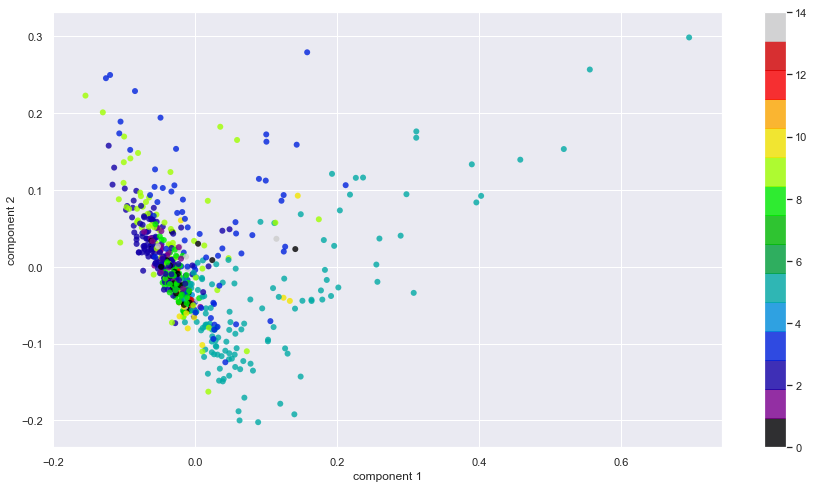

In [168]:
import seaborn as sns; sns.set()
plt.figure(figsize=(15,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral', 15))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Exploring the top venues of each clusters

In [169]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 0, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
23,48301,Intersection,American Restaurant,Gym / Fitness Center,Coffee Shop,Lake,BLOOMFIELD HILLS
27,48116,American Restaurant,Coffee Shop,Supermarket,Furniture / Home Store,Italian Restaurant,BRIGHTON
55,48126,Middle Eastern Restaurant,Pizza Place,Coffee Shop,Bakery,Deli / Bodega,DEARBORN
56,48128,Coffee Shop,Middle Eastern Restaurant,Bakery,Mediterranean Restaurant,Gym / Fitness Center,DEARBORN
84,48224,Diner,Pizza Place,Grocery Store,Sports Bar,Coffee Shop,DETROIT
85,48225,Italian Restaurant,Deli / Bodega,American Restaurant,Pet Store,Pharmacy,HARPER WOODS
88,48228,Middle Eastern Restaurant,Pharmacy,Sandwich Place,Discount Store,Gay Bar,DETROIT
90,48230,Grocery Store,Pizza Place,American Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,GROSSE POINTE
94,48236,Italian Restaurant,Sandwich Place,Pizza Place,American Restaurant,Grocery Store,GROSSE POINTE
98,48240,Discount Store,Coffee Shop,Grocery Store,Pharmacy,Diner,REDFORD


In [170]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 1, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
10,48105,Shipping Store,Park,Pizza Place,American Restaurant,Bank,ANN ARBOR
20,48415,Clothing Store,Fast Food Restaurant,Diner,Kitchen Supply Store,Kids Store,BIRCH RUN
24,48302,Sandwich Place,Pizza Place,Coffee Shop,Golf Course,Café,BLOOMFIELD HILLS
41,48346,Sandwich Place,Bar,American Restaurant,Pharmacy,Italian Restaurant,CLARKSTON
67,48206,Discount Store,Pharmacy,Fast Food Restaurant,Bank,Performing Arts Venue,DETROIT
97,48239,Pizza Place,Pharmacy,Grocery Store,Coffee Shop,Diner,REDFORD
101,48130,Pizza Place,Park,Sandwich Place,Brewery,Fast Food Restaurant,DEXTER
109,48334,Café,Thai Restaurant,Chinese Restaurant,Italian Restaurant,Golf Course,FARMINGTON
120,48509,Sandwich Place,Fast Food Restaurant,Pharmacy,Pizza Place,Coffee Shop,BURTON
132,48480,American Restaurant,Fast Food Restaurant,Pizza Place,Pharmacy,Chinese Restaurant,GRAND BLANC


In [171]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 2, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
7,48003,Bakery,Pizza Place,Diner,Bowling Alley,Gas Station,ALMONT
14,48005,Restaurant,Ice Cream Shop,Bakery,Park,Farm,ARMADA
19,48111,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,American Restaurant,IT Services,BELLEVILLE
34,48014,Ice Cream Shop,American Restaurant,Golf Course,Truck Stop,Sandwich Place,CAPAC
35,48117,Discount Store,Baseball Field,Furniture / Home Store,Sandwich Place,Pizza Place,CARLETON
39,48118,Pizza Place,Chinese Restaurant,Home Service,Gym / Fitness Center,American Restaurant,CHELSEA
42,48348,Park,Pharmacy,Pizza Place,Diner,Sandwich Place,CLARKSTON
46,48420,Bar,Racetrack,Discount Store,Cosmetics Shop,Diner,CLIO
51,48423,Discount Store,Convenience Store,Pizza Place,Coffee Shop,Café,DAVISON
65,48204,Fast Food Restaurant,Discount Store,Fried Chicken Joint,Pizza Place,Sandwich Place,DETROIT


In [172]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 3, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,49220,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
28,49229,Ice Cream Shop,Bar,Garden,Athletics & Sports,Pizza Place,BRITTON
45,49236,Bar,American Restaurant,Gun Shop,Movie Theater,Sandwich Place,CLINTON
49,48422,Discount Store,Massage Studio,Gas Station,Fast Food Restaurant,American Restaurant,CROSWELL
102,48428,Baseball Field,Other Great Outdoors,Pizza Place,Hardware Store,Gas Station,DRYDEN
112,48430,Construction & Landscaping,Golf Course,Lake,Rock Climbing Spot,Gas Station,FENTON
124,48433,American Restaurant,Pizza Place,Ice Cream Shop,Park,Mexican Restaurant,FLUSHING
146,49246,Ice Cream Shop,Pizza Place,Construction & Landscaping,Food,Dessert Shop,HORTON
166,48449,Intersection,Discount Store,Gas Station,Park,Farm,LENNON
177,49253,American Restaurant,Bar,Food & Drink Shop,Lake,Deli / Bodega,MANITOU BEACH


In [173]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 4, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
86,48226,American Restaurant,Coffee Shop,Hotel,Steakhouse,Park,DETROIT
91,48233,Park,Diner,Steakhouse,Waterfront,Cocktail Bar,DETROIT
100,48243,American Restaurant,Coffee Shop,Steakhouse,Hotel,Greek Restaurant,DETROIT


In [174]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 5, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
3,48001,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
8,48103,Park,Golf Driving Range,Lake,Hobby Shop,Farm,ANN ARBOR
15,48412,Campground,Playground,Golf Course,Bed & Breakfast,Lake,ATTICA
16,48006,Park,Bar,Convenience Store,Diner,Trail,AVOCA
25,48304,Intersection,Golf Course,Theater,Lawyer,Steakhouse,BLOOMFIELD HILLS
26,48114,Lake,Yoga Studio,American Restaurant,Convenience Store,Coffee Shop,BRIGHTON
29,49230,Lake,Harbor / Marina,Beach,Golf Course,Fabric Shop,BROOKLYN
37,49233,Arts & Crafts Store,Motorcycle Shop,Convenience Store,Sports Bar,Lake,CEMENT CITY
40,49234,Lake,Gym,Cosmetics Shop,Paintball Field,Construction & Landscaping,CLARKLAKE
47,48421,Beach,Construction & Landscaping,Bar,American Restaurant,Pizza Place,COLUMBIAVILLE


In [175]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 6, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
483,48824,Sushi Restaurant,Pizza Place,Bar,Coffee Shop,Ice Cream Shop,EAST LANSING
484,48825,Sushi Restaurant,Pizza Place,Coffee Shop,Ice Cream Shop,Bar,EAST LANSING


In [176]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 7, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
649,48915,Coffee Shop,Bar,Mexican Restaurant,Sandwich Place,Bakery,LANSING
652,48933,Bar,Coffee Shop,Mexican Restaurant,Bakery,Pizza Place,LANSING


In [177]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 8, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
1,49221,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
5,48101,American Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,ALLEN PARK
9,48104,Coffee Shop,Park,Grocery Store,Pizza Place,Sandwich Place,ANN ARBOR
11,48108,Hotel,Coffee Shop,Sandwich Place,Rental Car Location,Mexican Restaurant,ANN ARBOR
12,48109,Coffee Shop,Hotel,Trail,American Restaurant,Gym / Fitness Center,ANN ARBOR
21,48009,American Restaurant,Coffee Shop,Burger Joint,Spa,Pizza Place,BIRMINGHAM
38,48015,American Restaurant,Bar,Sandwich Place,Chinese Restaurant,Cosmetics Shop,CENTER LINE
43,48017,Sushi Restaurant,Pizza Place,Greek Restaurant,Bar,Park,CLAWSON
52,48120,Middle Eastern Restaurant,Mexican Restaurant,Deli / Bodega,Sandwich Place,Bar,DEARBORN
53,48122,Mexican Restaurant,Coffee Shop,Discount Store,Sandwich Place,Cosmetics Shop,MELVINDALE


In [178]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 9, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
30,48416,American Restaurant,Bar,Grocery Store,Sandwich Place,Pizza Place,BROWN CITY
32,48418,Home Service,Pizza Place,Bank,Athletics & Sports,Fish & Chips Shop,BYRON
60,48427,Park,Grocery Store,Tourist Information Center,Flower Shop,Fireworks Store,DECKERVILLE
89,48229,Pizza Place,Fast Food Restaurant,Grocery Store,American Restaurant,Discount Store,ECORSE
169,48450,American Restaurant,Lake,Breakfast Spot,Bar,Convenience Store,LEXINGTON
176,48158,American Restaurant,Automotive Shop,Fast Food Restaurant,Pizza Place,Pharmacy,MANCHESTER
198,49256,Pizza Place,Grocery Store,American Restaurant,Sandwich Place,Discount Store,MORENCI
219,48168,Farm,Golf Course,Grocery Store,Pizza Place,Zoo,NORTHVILLE
224,49265,Lake,Construction & Landscaping,Scenic Lookout,Pizza Place,Hot Dog Joint,ONSTED
227,48463,American Restaurant,Ice Cream Shop,Grocery Store,Music Venue,Fast Food Restaurant,OTISVILLE


In [179]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 10, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
48,49237,Ice Cream Shop,Golf Course,Restaurant,Sandwich Place,Diner,CONCORD
130,48438,Ice Cream Shop,Diner,IT Services,BBQ Joint,Golf Course,GOODRICH
143,49242,Lake,Golf Course,Record Shop,Ice Cream Shop,Bar,HILLSDALE
233,49269,Hobby Shop,Intersection,Coffee Shop,Golf Course,Diner,PARMA
249,48059,Ice Cream Shop,Pizza Place,Grocery Store,Trail,State / Provincial Park,FORT GRATIOT
274,48176,Ice Cream Shop,Tailor Shop,Park,Sandwich Place,Dog Run,SALINE
379,49614,Campground,Coffee Shop,Boat or Ferry,American Restaurant,Diner,BEAR LAKE
410,49620,Diner,Event Space,American Restaurant,Campground,Discount Store,BUCKLEY
521,49325,Skate Park,Grocery Store,Stables,Coffee Shop,Karaoke Bar,FREEPORT
585,49060,History Museum,Museum,Event Space,Gas Station,Diner,HICKORY CORNERS


In [180]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 11, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
620,49006,Coffee Shop,Mexican Restaurant,Sandwich Place,Chinese Restaurant,Middle Eastern Restaurant,KALAMAZOO
623,49009,Coffee Shop,Mexican Restaurant,Liquor Store,Discount Store,Furniture / Home Store,KALAMAZOO


In [181]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 12, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
64,48203,American Restaurant,Coffee Shop,Clothing Store,Grocery Store,Bar,HIGHLAND PARK
81,48220,Cocktail Bar,Bar,Thai Restaurant,Grocery Store,Sandwich Place,FERNDALE
82,48221,American Restaurant,Coffee Shop,Grocery Store,Pet Store,Chinese Restaurant,DETROIT
268,48069,Zoo Exhibit,Sushi Restaurant,Breakfast Spot,Pizza Place,Coffee Shop,PLEASANT RIDGE
621,49007,Coffee Shop,Brewery,Bar,Art Gallery,Pizza Place,KALAMAZOO


In [182]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 13, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
267,48067,Brewery,Pizza Place,Vegetarian / Vegan Restaurant,Café,Supermarket,ROYAL OAK
269,48070,Zoo Exhibit,Pizza Place,American Restaurant,Coffee Shop,Grocery Store,HUNTINGTON WOODS


In [183]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 14, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
62,48201,American Restaurant,Bar,Brewery,Gift Shop,Art Museum,DETROIT
63,48202,Bar,History Museum,Art Gallery,Pizza Place,Performing Arts Venue,DETROIT
69,48208,American Restaurant,Brewery,History Museum,Bar,Dog Run,DETROIT
77,48216,Mexican Restaurant,Bar,Diner,Bakery,Restaurant,DETROIT
92,48234,Discount Store,Fast Food Restaurant,Bar,Gay Bar,Fried Chicken Joint,DETROIT
245,48341,Sandwich Place,Gym / Fitness Center,American Restaurant,Brewery,Furniture / Home Store,PONTIAC
246,48342,Fast Food Restaurant,Discount Store,Pizza Place,Convenience Store,Automotive Shop,PONTIAC
306,48312,Sandwich Place,American Restaurant,Pizza Place,Bar,Dance Studio,STERLING HEIGHTS
332,48189,Lake,Pizza Place,Construction & Landscaping,Intersection,Bar,WHITMORE LAKE
544,49503,Brewery,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,GRAND RAPIDS
